<a href="https://colab.research.google.com/github/Shreya1911/mnist_data/blob/master/MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


8


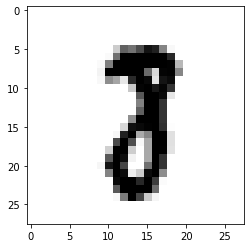

In [2]:
import matplotlib.pyplot as plt
image_index = 23008 # You may select anything up to 60,000
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing 

x_train /= 255
x_test /= 255

**Build** **model** **by** **using** **high** **level** **Keras** **API** 

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten 
input_size =784
output_size= 10
hidden_layer_size= 50

model= tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape=(28,28,1)),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(output_size, activation='softmax')  
                            ])

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3060 - accuracy: 0.9114
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1392 - accuracy: 0.9588
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1043 - accuracy: 0.9683
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0831 - accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0701 - accuracy: 0.9782
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0585 - accuracy: 0.9811
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0512 - accuracy: 0.9838
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0441 - accuracy: 0.9857
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0383 - accuracy: 0.9876
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.034

**Testing the model**

In [6]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1011 - accuracy: 0.9732


[0.10107402503490448, 0.9732000231742859]

6


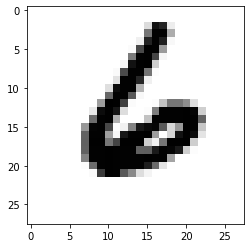

In [8]:
image_index = 8888
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())